In [ ]:
'''
@author: Mike 
--------------
# two layer
# sigmoid activation
# BN
# MSE 
# Vanila Gradient Descent
# target function: y = x ** 2
'''
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class BatchNorm():
    def __init__(self, d, eps=1e-8):
        self.gamma = np.random.rand(1, d)
        self.beta = np.random.rand(1, d)
        self.eps = eps
        self.x = None
        self.mu = None
        self.var = None
        self.x_hat = None
        self.y_hat = None

    def forward(self, x: np.ndarray):
        assert x.shape[1] == self.gamma.shape[1]
        self.x = x
        self.mu = x.mean(axis=0, keepdims=True)
        self.var = np.power(self.x - self.mu, 2).mean(axis=0, keepdims=True)
        self.x_hat = (self.x - self.mu) / np.sqrt(self.var + self.eps)
        self.y_hat = self.gamma * self.x_hat + self.beta
        return self.y_hat

    def backward(self, dy, lr):
        assert dy.shape[1] == self.gamma.shape[1]
        d_gamma = (dy * self.x_hat).mean(axis=0, keepdims=True)
        d_beta = dy.mean(axis=0, keepdims=True)
        d_x_hat = dy * self.gamma
        m = self.x.shape[0]
        d_x = (m ** 2 * d_x_hat - np.tile(d_x_hat.mean(axis=0, keepdims=True), (m, 1)) - self.x_hat * (
            (d_x_hat * self.x_hat).mean(axis=0, keepdims=True)))
        d_x = d_x / m ** 2 / np.sqrt(self.var + self.eps)

        self.gamma -= lr * d_gamma
        self.beta -= lr * d_beta
        return d_x

# generate training data
n = 1000
d = 1

x = 20 * np.random.rand(n, d) - 10
y = np.power(x, 2) + np.random.rand(n, d)
print(x.shape, y.shape)

# two layer
# sigmoid activation
# MSE
# Vanila Gradient Descent

layer = [10, 20]
lr = 0.0001
iter = 1000

# initialize W
layer.insert(0, x.shape[1])
layer.append(y.shape[1])
w1 = np.random.rand(layer[0], layer[1])  * 0.01  # 1 x 20
b1 = np.random.rand() * 0.01
bn1 = BatchNorm(layer[1])
w2 = np.random.rand(layer[1], layer[2])  * 0.01  # 20 x 10
b2 = np.random.rand() * 0.01
bn2 = BatchNorm(layer[2])
w3 = np.random.rand(layer[2], layer[3])  * 0.01  # 10 x 1
# linear activation parameters
b3_1 = np.random.rand(layer[3], 1)
b3_2 = np.random.rand() * 0.01

loss_list = []

for i in range(iter):
    # forward propagation
    z1 = np.dot(x, w1) + b1  # n x 20
    a1 = 1 / (1 + np.exp(-z1))  # n x 20

    a1_bn = bn1.forward(a1)

    z2 = np.dot(a1_bn, w2) + b2  # n x 10
    a2 = 1 / (1 + np.exp(-z2))  # n x 10

    a2_bn = bn2.forward(a2)

    z3 = np.dot(a2_bn, w3)  # n x 1
    a3 = np.dot(z3, b3_1) + b3_2  # n x 1

    # loss
    l = np.power(y - a3, 2)  # n x 1
    avg_loss = l.mean()
    if (i + 1) % 100 == 0:
        print('Iter:{}\tAvg_Loss:{:.5f}'.format(i + 1, avg_loss))
    loss_list.append(avg_loss)

    # backward propagation
    da3 = 2 * (a3 - y)  # n x 1
    db3_1 = (da3 * z3).mean(axis=0, keepdims=True)  # n x 1
    db3_2 = da3.mean()
    dz3 = da3 * b3_1  # n x 1
    dw3 = np.dot(a2_bn.T, dz3) / n  # 10 x 1

    da2_bn = np.dot(dz3, w3.T)  # n x 10
    da2 = bn2.backward(da2_bn, lr=lr)

    dz2 = da2 * a2 * (1 - a2)  # n x 10
    db2 = dz2.mean()
    dw2 = np.dot(a1_bn.T, dz2) / n  # 20 x 10

    da1_bn = np.dot(dz2, w2.T)  # n x 20

    da1 = bn1.backward(da1_bn, lr=lr)  # n x 20

    dz1 = da1 * a1 * (1 - a1)  # n x 20
    db1 = dz1.mean()
    dw1 = np.dot(x.T, dz1) / n  # 1 x 20

    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2
    w3 -= lr * dw3
    b3_1 -= lr * db3_1
    b3_2 -= lr * db3_2

(1000, 1) (1000, 1)
Iter:100	Avg_Loss:1829.81060
Iter:200	Avg_Loss:459.26519
Iter:300	Avg_Loss:66.59667
Iter:400	Avg_Loss:267.24853
Iter:500	Avg_Loss:10.30638
Iter:600	Avg_Loss:15.13072
Iter:700	Avg_Loss:5.63941
Iter:800	Avg_Loss:2.15089
Iter:900	Avg_Loss:1.03482
Iter:1000	Avg_Loss:0.66793


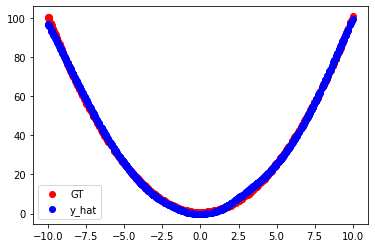

In [ ]:
c1 =plt.scatter(x,y,c='r',label='GT')
c2 = plt.scatter(x,a3,c='b',label='y_hat')
plt.legend()
plt.show()